In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install -r /content/drive/MyDrive/Colab\ Notebooks/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.2/167.2 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 15.2 MB/s eta 0:0

In [ ]:
import os
os.environ['GPU_TYPE'] = str(os.popen('nvidia-smi --query-gpu=name --format=csv,noheader').read())

def getGPUArch(argument):
  try:
    argument = argument.strip()
    # All Colab GPUs
    archTypes = {
        "Tesla V100-SXM2-16GB": "-gencode arch=compute_70,code=[sm_70,compute_70]",
        "Tesla K80": "-gencode arch=compute_37,code=sm_37",
        "Tesla T4": "-gencode arch=compute_75,code=[sm_75,compute_75]",
        "Tesla P40": "-gencode arch=compute_61,code=sm_61",
        "Tesla P4": "-gencode arch=compute_61,code=sm_61",
        "Tesla P100-PCIE-16GB": "-gencode arch=compute_60,code=sm_60"

      }
    return archTypes[argument]
  except KeyError:
    return "GPU must be added to GPU Commands"
os.environ['ARCH_VALUE'] = getGPUArch(os.environ['GPU_TYPE'])

print("GPU Type: " + os.environ['GPU_TYPE'])
print("ARCH Value: " + os.environ['ARCH_VALUE'])

GPU Type: Tesla T4

ARCH Value: -gencode arch=compute_75,code=[sm_75,compute_75]


In [ ]:
!nvidia-smi

Sun Jul  2 09:41:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
from keras.utils import np_utils
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools
import cv2
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import zipfile
from tqdm import tqdm

# Path ke file ZIP
zip_path = '/content/drive/MyDrive/bagi.zip'

# Path untuk mengekstrak file ZIP
extract_path = '/content/drive/MyDrive/SplitDataset/'

# Membuka file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Mengetahui total jumlah file yang akan diekstrak
    total_files = len(zip_ref.namelist())

    # Menggunakan tqdm untuk menampilkan loading progress
    with tqdm(total=total_files, desc='Extracting ZIP') as pbar:
        # Mengekstrak seluruh isi file ZIP ke direktori tujuan
        for file in zip_ref.namelist():
            zip_ref.extract(file, extract_path)
            pbar.update(1)

print("File ZIP telah berhasil diekstrak.")

Extracting ZIP: 100%|██████████| 2513/2513 [00:14<00:00, 170.35it/s]

File ZIP telah berhasil diekstrak.


In [ ]:
print("Dataset Train :")
print(os.listdir('/content/drive/MyDrive/SplitDataset/bagi/train'))
print("Dataset Validasi")
print(os.listdir('/content/drive/MyDrive/SplitDataset/bagi/validation'))

Dataset Train :
['Pa Lulun Pao', 'Pa Somba', 'Pa Tangke Lumu', 'Pa Tumuru', 'Tidak Terdeteksi']
Dataset Validasi
['Pa Lulun Pao', 'Pa Somba', 'Pa Tangke Lumu', 'Pa Tumuru', 'Tidak Terdeteksi']


In [ ]:

# Direktori train
train_directory = "/content/drive/MyDrive/SplitDataset/bagi/train"
# Direktori validasi
valid_directory = "/content/drive/MyDrive/SplitDataset/bagi/validation"

# Mendapatkan daftar kelas dalam direktori train
train_classes = os.listdir(train_directory)

# Mendapatkan daftar kelas dalam direktori validasi
valid_classes = os.listdir(valid_directory)

# Menampilkan nama kelas dan jumlah file dalam direktori train
print("Total jumlah file dalam setiap kelas di direktori train:")
total_train_files = 0
for class_name in train_classes:
    class_path = os.path.join(train_directory, class_name)
    num_files = len(os.listdir(class_path))
    total_train_files += num_files
    print(f"Kelas: {class_name}, Jumlah file: {num_files}")

# Menampilkan total jumlah file dalam direktori train
print(f"Total jumlah file dalam direktori train: {total_train_files}\n")

# Menampilkan nama kelas dan jumlah file dalam direktori validasi
print("Total jumlah file dalam setiap kelas di direktori validasi:")
total_valid_files = 0
for class_name in valid_classes:
    class_path = os.path.join(valid_directory, class_name)
    num_files = len(os.listdir(class_path))
    total_valid_files += num_files
    print(f"Kelas: {class_name}, Jumlah file: {num_files}")

# Menampilkan total jumlah file dalam direktori validasi
print(f"Total jumlah file dalam direktori validasi: {total_valid_files}")


Total jumlah file dalam setiap kelas di direktori train:
Kelas: Pa Lulun Pao, Jumlah file: 400
Kelas: Pa Somba, Jumlah file: 400
Kelas: Pa Tangke Lumu, Jumlah file: 400
Kelas: Pa Tumuru, Jumlah file: 400
Kelas: Tidak Terdeteksi, Jumlah file: 400
Total jumlah file dalam direktori train: 2000

Total jumlah file dalam setiap kelas di direktori validasi:
Kelas: Pa Lulun Pao, Jumlah file: 100
Kelas: Pa Somba, Jumlah file: 100
Kelas: Pa Tangke Lumu, Jumlah file: 100
Kelas: Pa Tumuru, Jumlah file: 100
Kelas: Tidak Terdeteksi, Jumlah file: 100
Total jumlah file dalam direktori validasi: 500


#EPOCH 100

In [ ]:
img_rows = 224
img_cols = 224
input_shape = (img_rows,img_cols,3)
epochs = 100
batch_size = 8
num_of_classes = 5
num_of_train_samples = 2000
num_of_valid_samples = 500

lr = 0.00001
print('Learning rate: ', lr)

Learning rate:  1e-05


In [ ]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_directory,
                                                                         class_mode='categorical',
                                                                         batch_size=batch_size,
                                                                         target_size=(img_rows, img_cols),
                                                                         color_mode="rgb",
                                                                         shuffle=True)


valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=valid_directory,
                                                                         class_mode='categorical',
                                                                         batch_size=batch_size,
                                                                         target_size=(img_rows, img_cols),
                                                                         color_mode="rgb",
                                                                         shuffle=True)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
def getResNet50Model(lastFourTrainable=False):
  resnet_model = ResNet50(weights='imagenet', input_shape=input_shape, include_top=True)
  for layer in resnet_model.layers[:]:
    layer.trainable = False

  output = resnet_model.get_layer('avg_pool').output
  output = Flatten(name='new_flatten')(output)
  output = Dense(units=1024, activation='relu', name='new_fc')(output)
  output = Dense(units=5, activation='softmax')(output)
  resnet_model = Model(resnet_model.input, output)

  if lastFourTrainable == True:
    resnet_model.get_layer('conv5_block3_2_bn').trainable = True
    resnet_model.get_layer('conv5_block3_3_conv').trainable = True
    resnet_model.get_layer('conv5_block3_3_bn').trainable = True
    resnet_model.get_layer('new_fc').trainable = True


  resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
  resnet_model.summary()


  return resnet_model

In [ ]:
resnet_model = getResNet50Model(lastFourTrainable=True)

102967424/102967424 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [ ]:
import pandas as pd

# Menjalankan proses training dan menyimpan hasil history
history = resnet_model.fit_generator(train_generator,
                                     epochs=epochs,
                                     steps_per_epoch=num_of_train_samples//batch_size,
                                     validation_data=valid_generator,
                                     validation_steps=num_of_valid_samples // batch_size)

# Membuat DataFrame dari history
history_df = pd.DataFrame(history.history)

# Menyimpan DataFrame ke dalam file CSV
history_df.to_csv('/content/drive/MyDrive/Colab Notebooks/History/history(0.01).csv', index=False)


Epoch 1/100
250/250 [==============================] - 14s 55ms/step - loss: 0.7715 - accuracy: 0.7540 - val_loss: 0.6874 - val_accuracy: 0.8004
Epoch 2/100
250/250 [==============================] - 16s 63ms/step - loss: 0.7167 - accuracy: 0.7675 - val_loss: 0.6386 - val_accuracy: 0.8185
Epoch 3/100
250/250 [==============================] - 14s 56ms/step - loss: 0.6659 - accuracy: 0.7915 - val_loss: 0.6056 - val_accuracy: 0.8185
Epoch 4/100
250/250 [==============================] - 16s 62ms/step - loss: 0.6272 - accuracy: 0.7970 - val_loss: 0.5700 - val_accuracy: 0.8387
Epoch 5/100
250/250 [==============================] - 16s 65ms/step - loss: 0.5854 - accuracy: 0.8195 - val_loss: 0.5669 - val_accuracy: 0.8286
Epoch 6/100
250/250 [==============================] - 15s 58ms/step - loss: 0.5522 - accuracy: 0.8275 - val_loss: 0.5095 - val_accuracy: 0.8609
Epoch 7/100
250/250 [==============================] - 16s 64ms/step - loss: 0.5158 - accuracy: 0.8505 - val_loss: 0.4798 - val_ac

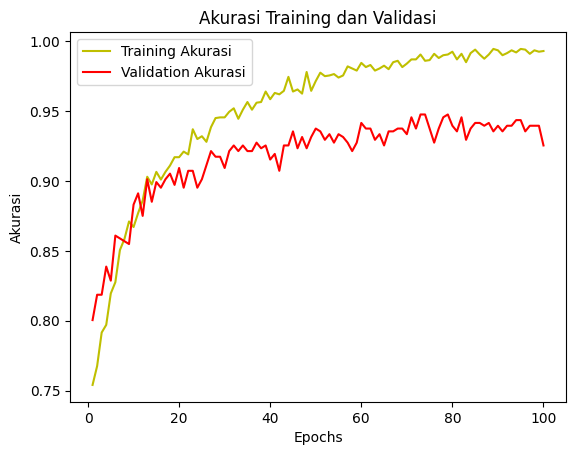

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Akurasi')
plt.plot(epochs, val_acc, 'r', label='Validation Akurasi')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

In [ ]:
classifier_json=resnet_model.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/Models/model_Batch100.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    resnet_model.save_weights("/content/drive/MyDrive/Colab Notebooks/Models/my_model_Batch100.h5")
    resnet_model.save("/content/drive/MyDrive/Colab Notebooks/Models/model_Batch100.h5")
    print("Saved model to disk")

Saved model to disk


In [ ]:
labels = (train_generator.class_indices)
print(labels)

{'Pa Lulun Pao': 0, 'Pa Somba': 1, 'Pa Tangke Lumu': 2, 'Pa Tumuru': 3, 'Tidak Terdeteksi': 4}


In [ ]:
#Load model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Models/model_Batch100.h5', compile=False)

In [ ]:
# Memprediksi kelas menggunakan model pada data validasi
valid_predictions = model.predict_generator(valid_generator)

# Mengambil indeks kelas dengan nilai probabilitas terbesar
valid_predicted_classes = np.argmax(valid_predictions, axis=1)

# Mengambil daftar nama kelas
class_names = list(train_generator.class_indices.keys())

# Menghitung ground truth kelas pada data validasi
valid_true_classes = valid_generator.classes

# Membuat confusion matrix
cm = confusion_matrix(valid_true_classes, valid_predicted_classes)

# Membuat classification report
classification_rep = classification_report(valid_true_classes, valid_predicted_classes, target_names=class_names)

# Menghitung akurasi
accuracy = accuracy_score(valid_true_classes, valid_predicted_classes)

# Menampilkan hasil
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_rep)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[21 24 20 17 18]
 [15 28 17 25 15]
 [18 23 20 20 19]
 [18 17 11 25 29]
 [23 22 24 14 17]]

Classification Report:
                  precision    recall  f1-score   support

    Pa Lulun Pao       0.22      0.21      0.22       100
        Pa Somba       0.25      0.28      0.26       100
  Pa Tangke Lumu       0.22      0.20      0.21       100
       Pa Tumuru       0.25      0.25      0.25       100
Tidak Terdeteksi       0.17      0.17      0.17       100

        accuracy                           0.22       500
       macro avg       0.22      0.22      0.22       500
    weighted avg       0.22      0.22      0.22       500


Accuracy: 0.222


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(valid_true_classes, valid_predicted_classes)

# Membuat label untuk sumbu x dan y
labels = list(train_generator.class_indices.keys())

# Membuat plot menggunakan heatmap dari seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


#EPOCH 200

In [ ]:
img_rows = 224
img_cols = 224
input_shape = (img_rows,img_cols,3)
epochs = 200
batch_size = 8
num_of_classes = 5
num_of_train_samples = 2000
num_of_valid_samples = 500

lr = 0.00001
print('Learning rate: ', lr)

Learning rate:  1e-05


In [ ]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_directory,
                                                                         class_mode='categorical',
                                                                         batch_size=batch_size,
                                                                         target_size=(img_rows, img_cols),
                                                                         color_mode="rgb",
                                                                         shuffle=True)


valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=valid_directory,
                                                                         class_mode='categorical',
                                                                         batch_size=batch_size,
                                                                         target_size=(img_rows, img_cols),
                                                                         color_mode="rgb",
                                                                         shuffle=True)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
def getResNet50Model(lastFourTrainable=False):
  resnet_model = ResNet50(weights='imagenet', input_shape=input_shape, include_top=True)
  for layer in resnet_model.layers[:]:
    layer.trainable = False

  output = resnet_model.get_layer('avg_pool').output
  output = Flatten(name='new_flatten')(output)
  output = Dense(units=1024, activation='relu', name='new_fc')(output)
  output = Dense(units=5, activation='softmax')(output)
  resnet_model = Model(resnet_model.input, output)

  if lastFourTrainable == True:
    resnet_model.get_layer('conv5_block3_2_bn').trainable = True
    resnet_model.get_layer('conv5_block3_3_conv').trainable = True
    resnet_model.get_layer('conv5_block3_3_bn').trainable = True
    resnet_model.get_layer('new_fc').trainable = True


  resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
  resnet_model.summary()


  return resnet_model

In [ ]:
resnet_model = getResNet50Model(lastFourTrainable=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
import pandas as pd

# Menjalankan proses training dan menyimpan hasil history
history = resnet_model.fit_generator(train_generator,
                                     epochs=epochs,
                                     steps_per_epoch=num_of_train_samples//batch_size,
                                     validation_data=valid_generator,
                                     validation_steps=num_of_valid_samples // batch_size)

# Membuat DataFrame dari history
history_df = pd.DataFrame(history.history)

# Menyimpan DataFrame ke dalam file CSV
history_df.to_csv('/content/drive/MyDrive/Colab Notebooks/History/history(0.01).csv', index=False)


Epoch 1/200
250/250 [==============================] - 19s 62ms/step - loss: 1.3333 - accuracy: 0.4655 - val_loss: 1.3188 - val_accuracy: 0.5222
Epoch 2/200
250/250 [==============================] - 16s 63ms/step - loss: 1.0650 - accuracy: 0.6060 - val_loss: 0.9584 - val_accuracy: 0.7036
Epoch 3/200
250/250 [==============================] - 16s 63ms/step - loss: 0.9462 - accuracy: 0.6700 - val_loss: 0.8206 - val_accuracy: 0.7762
Epoch 4/200
250/250 [==============================] - 16s 66ms/step - loss: 0.8451 - accuracy: 0.7155 - val_loss: 0.7492 - val_accuracy: 0.7984
Epoch 5/200
250/250 [==============================] - 16s 62ms/step - loss: 0.7649 - accuracy: 0.7615 - val_loss: 0.6783 - val_accuracy: 0.8065
Epoch 6/200
250/250 [==============================] - 14s 55ms/step - loss: 0.7173 - accuracy: 0.7665 - val_loss: 0.6337 - val_accuracy: 0.8327
Epoch 7/200
250/250 [==============================] - 15s 60ms/step - loss: 0.6645 - accuracy: 0.7900 - val_loss: 0.5990 - val_ac

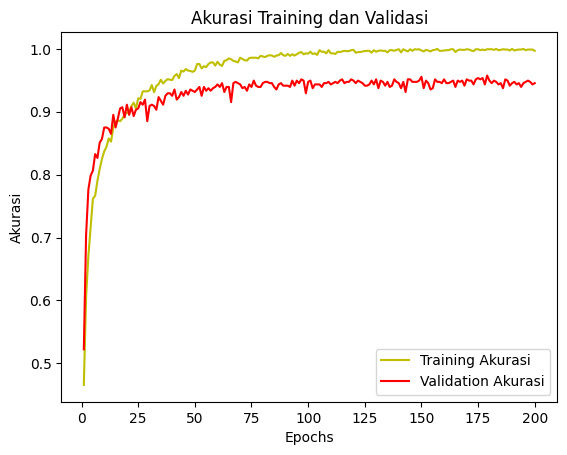

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Akurasi')
plt.plot(epochs, val_acc, 'r', label='Validation Akurasi')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

In [ ]:
classifier_json=resnet_model.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/Models/model_Batch200.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    resnet_model.save_weights("/content/drive/MyDrive/Colab Notebooks/Models/my_model_Batch200.h5")
    resnet_model.save("/content/drive/MyDrive/Colab Notebooks/Models/model_Batch200.h5")
    print("Saved model to disk")

Saved model to disk


In [ ]:
labels = (train_generator.class_indices)
print(labels)

{'Pa Lulun Pao': 0, 'Pa Somba': 1, 'Pa Tangke Lumu': 2, 'Pa Tumuru': 3, 'Tidak Terdeteksi': 4}


In [ ]:
#Load model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Models/model_Batch200.h5', compile=False)

In [ ]:
# Memprediksi kelas menggunakan model pada data validasi
valid_predictions = model.predict_generator(valid_generator)

# Mengambil indeks kelas dengan nilai probabilitas terbesar
valid_predicted_classes = np.argmax(valid_predictions, axis=1)

# Mengambil daftar nama kelas
class_names = list(train_generator.class_indices.keys())

# Menghitung ground truth kelas pada data validasi
valid_true_classes = valid_generator.classes

# Membuat confusion matrix
cm = confusion_matrix(valid_true_classes, valid_predicted_classes)

# Membuat classification report
classification_rep = classification_report(valid_true_classes, valid_predicted_classes, target_names=class_names)

# Menghitung akurasi
accuracy = accuracy_score(valid_true_classes, valid_predicted_classes)

# Menampilkan hasil
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_rep)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[21 18 20 23 18]
 [24 16 20 14 26]
 [12 20 22 28 18]
 [21 27 14 17 21]
 [20 22 19 23 16]]

Classification Report:
                  precision    recall  f1-score   support

    Pa Lulun Pao       0.21      0.21      0.21       100
        Pa Somba       0.16      0.16      0.16       100
  Pa Tangke Lumu       0.23      0.22      0.23       100
       Pa Tumuru       0.16      0.17      0.17       100
Tidak Terdeteksi       0.16      0.16      0.16       100

        accuracy                           0.18       500
       macro avg       0.18      0.18      0.18       500
    weighted avg       0.18      0.18      0.18       500


Accuracy: 0.184


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(valid_true_classes, valid_predicted_classes)

# Membuat label untuk sumbu x dan y
labels = list(train_generator.class_indices.keys())

# Membuat plot menggunakan heatmap dari seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


#EPOCH 300

In [ ]:
img_rows = 224
img_cols = 224
input_shape = (img_rows,img_cols,3)
epochs = 300
batch_size = 8
num_of_classes = 5
num_of_train_samples = 2000
num_of_valid_samples = 500

lr = 0.00001

print('Learning rate: ', lr)

Learning rate:  1e-05


In [ ]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_directory,
                                                                         class_mode='categorical',
                                                                         batch_size=batch_size,
                                                                         target_size=(img_rows, img_cols),
                                                                         color_mode="rgb",
                                                                         shuffle=True)


valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=valid_directory,
                                                                         class_mode='categorical',
                                                                         batch_size=batch_size,
                                                                         target_size=(img_rows, img_cols),
                                                                         color_mode="rgb",
                                                                         shuffle=True)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
def getResNet50Model(lastFourTrainable=False):
  resnet_model = ResNet50(weights='imagenet', input_shape=input_shape, include_top=True)
  for layer in resnet_model.layers[:]:
    layer.trainable = False

  output = resnet_model.get_layer('avg_pool').output
  output = Flatten(name='new_flatten')(output)
  output = Dense(units=1024, activation='relu', name='new_fc')(output)
  output = Dense(units=5, activation='softmax')(output)
  resnet_model = Model(resnet_model.input, output)

  if lastFourTrainable == True:
    resnet_model.get_layer('conv5_block3_2_bn').trainable = True
    resnet_model.get_layer('conv5_block3_3_conv').trainable = True
    resnet_model.get_layer('conv5_block3_3_bn').trainable = True
    resnet_model.get_layer('new_fc').trainable = True


  resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
  resnet_model.summary()


  return resnet_model

In [ ]:
resnet_model = getResNet50Model(lastFourTrainable=True)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
import pandas as pd

# Menjalankan proses training dan menyimpan hasil history
history = resnet_model.fit_generator(train_generator,
                                     epochs=epochs,
                                     steps_per_epoch=num_of_train_samples//batch_size,
                                     validation_data=valid_generator,
                                     validation_steps=num_of_valid_samples // batch_size)

# Membuat DataFrame dari history
history_df = pd.DataFrame(history.history)

# Menyimpan DataFrame ke dalam file CSV
history_df.to_csv('/content/drive/MyDrive/Colab Notebooks/History/history(0.01).csv', index=False)


Epoch 1/300
250/250 [==============================] - 22s 71ms/step - loss: 1.3235 - accuracy: 0.4570 - val_loss: 1.2999 - val_accuracy: 0.4859
Epoch 2/300
250/250 [==============================] - 14s 56ms/step - loss: 1.0606 - accuracy: 0.6250 - val_loss: 0.9383 - val_accuracy: 0.7036
Epoch 3/300
250/250 [==============================] - 15s 59ms/step - loss: 0.9285 - accuracy: 0.6785 - val_loss: 0.8165 - val_accuracy: 0.7440
Epoch 4/300
250/250 [==============================] - 16s 62ms/step - loss: 0.8475 - accuracy: 0.7225 - val_loss: 0.7330 - val_accuracy: 0.8044
Epoch 5/300
250/250 [==============================] - 15s 60ms/step - loss: 0.7617 - accuracy: 0.7575 - val_loss: 0.6740 - val_accuracy: 0.8226
Epoch 6/300
250/250 [==============================] - 15s 61ms/step - loss: 0.6988 - accuracy: 0.7780 - val_loss: 0.6304 - val_accuracy: 0.8306
Epoch 7/300
250/250 [==============================] - 14s 55ms/step - loss: 0.6519 - accuracy: 0.8065 - val_loss: 0.6045 - val_ac

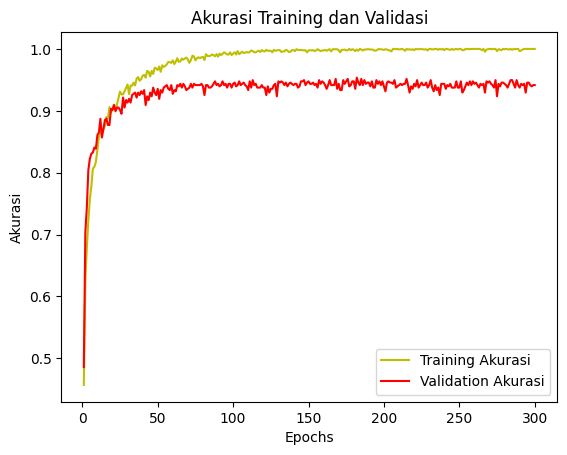

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Akurasi')
plt.plot(epochs, val_acc, 'r', label='Validation Akurasi')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

In [ ]:
classifier_json=resnet_model.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/Models/model_Batch300.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    resnet_model.save_weights("/content/drive/MyDrive/Colab Notebooks/Models/my_model_Batch300.h5")
    resnet_model.save("/content/drive/MyDrive/Colab Notebooks/Models/model_Batch300.h5")
    print("Saved model to disk")

Saved model to disk


In [ ]:
labels = (train_generator.class_indices)
print(labels)

{'Pa Lulun Pao': 0, 'Pa Somba': 1, 'Pa Tangke Lumu': 2, 'Pa Tumuru': 3, 'Tidak Terdeteksi': 4}


In [ ]:
#Load model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Models/model_Batch300.h5', compile=False)

In [ ]:
# Memprediksi kelas menggunakan model pada data validasi
valid_predictions = model.predict_generator(valid_generator)

# Mengambil indeks kelas dengan nilai probabilitas terbesar
valid_predicted_classes = np.argmax(valid_predictions, axis=1)

# Mengambil daftar nama kelas
class_names = list(train_generator.class_indices.keys())

# Menghitung ground truth kelas pada data validasi
valid_true_classes = valid_generator.classes

# Membuat confusion matrix
cm = confusion_matrix(valid_true_classes, valid_predicted_classes)

# Membuat classification report
classification_rep = classification_report(valid_true_classes, valid_predicted_classes, target_names=class_names)

# Menghitung akurasi
accuracy = accuracy_score(valid_true_classes, valid_predicted_classes)

# Menampilkan hasil
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_rep)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[11 22 22 29 16]
 [18 18 19 17 28]
 [19 21 17 23 20]
 [25 19 16 23 17]
 [20 19 25 18 18]]

Classification Report:
                  precision    recall  f1-score   support

    Pa Lulun Pao       0.12      0.11      0.11       100
        Pa Somba       0.18      0.18      0.18       100
  Pa Tangke Lumu       0.17      0.17      0.17       100
       Pa Tumuru       0.21      0.23      0.22       100
Tidak Terdeteksi       0.18      0.18      0.18       100

        accuracy                           0.17       500
       macro avg       0.17      0.17      0.17       500
    weighted avg       0.17      0.17      0.17       500


Accuracy: 0.174


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(valid_true_classes, valid_predicted_classes)

# Membuat label untuk sumbu x dan y
labels = list(train_generator.class_indices.keys())

# Membuat plot menggunakan heatmap dari seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


#EPOCH 400

In [ ]:
img_rows = 224
img_cols = 224
input_shape = (img_rows,img_cols,3)
epochs = 400
batch_size = 8
num_of_classes = 5
num_of_train_samples = 2000
num_of_valid_samples = 500

lr = 0.00001
print('Learning rate: ', lr)

Learning rate:  1e-05


In [ ]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_directory,
                                                                         class_mode='categorical',
                                                                         batch_size=batch_size,
                                                                         target_size=(img_rows, img_cols),
                                                                         color_mode="rgb",
                                                                         shuffle=True)


valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=valid_directory,
                                                                         class_mode='categorical',
                                                                         batch_size=batch_size,
                                                                         target_size=(img_rows, img_cols),
                                                                         color_mode="rgb",
                                                                         shuffle=True)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
def getResNet50Model(lastFourTrainable=False):
  resnet_model = ResNet50(weights='imagenet', input_shape=input_shape, include_top=True)
  for layer in resnet_model.layers[:]:
    layer.trainable = False

  output = resnet_model.get_layer('avg_pool').output
  output = Flatten(name='new_flatten')(output)
  output = Dense(units=1024, activation='relu', name='new_fc')(output)
  output = Dense(units=5, activation='softmax')(output)
  resnet_model = Model(resnet_model.input, output)

  if lastFourTrainable == True:
    resnet_model.get_layer('conv5_block3_2_bn').trainable = True
    resnet_model.get_layer('conv5_block3_3_conv').trainable = True
    resnet_model.get_layer('conv5_block3_3_bn').trainable = True
    resnet_model.get_layer('new_fc').trainable = True


  resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
  resnet_model.summary()


  return resnet_model

In [ ]:
resnet_model = getResNet50Model(lastFourTrainable=True)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
import pandas as pd

# Menjalankan proses training dan menyimpan hasil history
history = resnet_model.fit_generator(train_generator,
                                     epochs=epochs,
                                     steps_per_epoch=num_of_train_samples//batch_size,
                                     validation_data=valid_generator,
                                     validation_steps=num_of_valid_samples // batch_size)

# Membuat DataFrame dari history
history_df = pd.DataFrame(history.history)

# Menyimpan DataFrame ke dalam file CSV
history_df.to_csv('/content/drive/MyDrive/Colab Notebooks/History/history(0.01).csv', index=False)


Epoch 1/400
250/250 [==============================] - 20s 66ms/step - loss: 1.3337 - accuracy: 0.4665 - val_loss: 1.2866 - val_accuracy: 0.5323
Epoch 2/400
250/250 [==============================] - 15s 61ms/step - loss: 1.0744 - accuracy: 0.6000 - val_loss: 0.9493 - val_accuracy: 0.6976
Epoch 3/400
250/250 [==============================] - 14s 57ms/step - loss: 0.9308 - accuracy: 0.6790 - val_loss: 0.8198 - val_accuracy: 0.7298
Epoch 4/400
250/250 [==============================] - 13s 52ms/step - loss: 0.8360 - accuracy: 0.7240 - val_loss: 0.7279 - val_accuracy: 0.7843
Epoch 5/400
250/250 [==============================] - 14s 56ms/step - loss: 0.7603 - accuracy: 0.7475 - val_loss: 0.6752 - val_accuracy: 0.8145
Epoch 6/400
250/250 [==============================] - 15s 61ms/step - loss: 0.7117 - accuracy: 0.7825 - val_loss: 0.6299 - val_accuracy: 0.8206
Epoch 7/400
250/250 [==============================] - 14s 56ms/step - loss: 0.6506 - accuracy: 0.8020 - val_loss: 0.5839 - val_ac

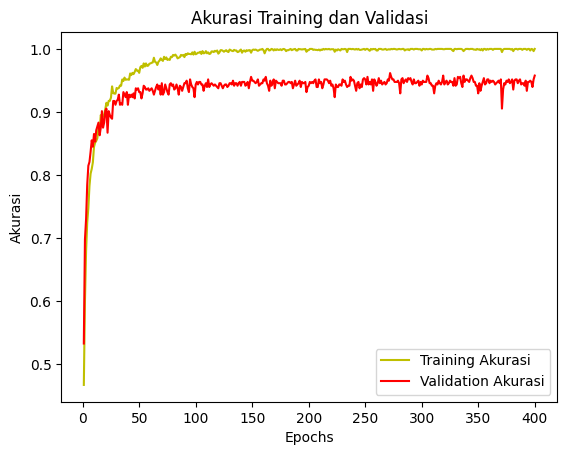

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Akurasi')
plt.plot(epochs, val_acc, 'r', label='Validation Akurasi')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

In [ ]:
classifier_json=resnet_model.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/Models/model_Batch400.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    resnet_model.save_weights("/content/drive/MyDrive/Colab Notebooks/Models/my_model_Batch400.h5")
    resnet_model.save("/content/drive/MyDrive/Colab Notebooks/Models/model_Batch400.h5")
    print("Saved model to disk")

Saved model to disk


In [ ]:
labels = (train_generator.class_indices)
print(labels)

{'Pa Lulun Pao': 0, 'Pa Somba': 1, 'Pa Tangke Lumu': 2, 'Pa Tumuru': 3, 'Tidak Terdeteksi': 4}


In [ ]:
#Load model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Models/model_Batch400.h5', compile=False)

In [ ]:
# Memprediksi kelas menggunakan model pada data validasi
valid_predictions = model.predict_generator(valid_generator)

# Mengambil indeks kelas dengan nilai probabilitas terbesar
valid_predicted_classes = np.argmax(valid_predictions, axis=1)

# Mengambil daftar nama kelas
class_names = list(train_generator.class_indices.keys())

# Menghitung ground truth kelas pada data validasi
valid_true_classes = valid_generator.classes

# Membuat confusion matrix
cm = confusion_matrix(valid_true_classes, valid_predicted_classes)

# Membuat classification report
classification_rep = classification_report(valid_true_classes, valid_predicted_classes, target_names=class_names)

# Menghitung akurasi
accuracy = accuracy_score(valid_true_classes, valid_predicted_classes)

# Menampilkan hasil
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_rep)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[19 25 26 18 12]
 [18 17 24 18 23]
 [25 21 14 22 18]
 [16 22 14 27 21]
 [22 14 20 19 25]]

Classification Report:
                  precision    recall  f1-score   support

    Pa Lulun Pao       0.19      0.19      0.19       100
        Pa Somba       0.17      0.17      0.17       100
  Pa Tangke Lumu       0.14      0.14      0.14       100
       Pa Tumuru       0.26      0.27      0.26       100
Tidak Terdeteksi       0.25      0.25      0.25       100

        accuracy                           0.20       500
       macro avg       0.20      0.20      0.20       500
    weighted avg       0.20      0.20      0.20       500


Accuracy: 0.204


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(valid_true_classes, valid_predicted_classes)

# Membuat label untuk sumbu x dan y
labels = list(train_generator.class_indices.keys())

# Membuat plot menggunakan heatmap dari seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
